# Multi-class Image Classification with CNN using Tensorflow
---

<!-- Project Introduction -->
The purpose of this notebook is to build a Convolutional Neural Network (CNN) for predicting the class of an image.

<!-- About the data -->

---
<!-- Table of Contents -->

1. [Setup](#setup)
1. [Architecture](#model-architecture)
    1. [Baseline model](#baseline)
    1. [LeNet-5](#lenet-5)
    1. [ResNet](#resnet)
1. [Results](#plot-results)
1. [References](#references)

___

## Setup

In [ ]:
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

## Input images

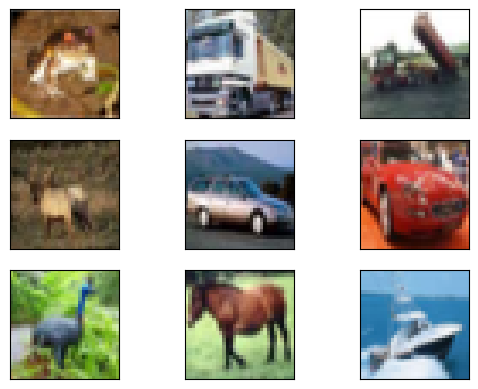

In [ ]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

## Model Architecture

### Baseline

In [205]:
model = keras.models.Sequential([
    keras.layers.InputLayer(shape=(32, 32, 3)),
    keras.layers.Normalization(),
    keras.layers.Conv2D(32, 3, padding="same", activation='relu'),
    keras.layers.Conv2D(32, 3, padding="same", activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, 3, padding="same", activation='relu'),
    keras.layers.Conv2D(64, 3, padding="same", activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, 3, padding="same", activation='relu'),
    keras.layers.Conv2D(128, 3, padding="same", activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [206]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_21                │ (None, 32, 32, 3)      │             7 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,577 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 7 (32.00 B)

In [207]:
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])

In [208]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.2708 - loss: 2.3348 - val_accuracy: 0.5406 - val_loss: 1.2640
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.5175 - loss: 1.3419 - val_accuracy: 0.6071 - val_loss: 1.0864
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5962 - loss: 1.1423 - val_accuracy: 0.6522 - val_loss: 0.9997
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6281 - loss: 1.0612 - val_accuracy: 0.6625 - val_loss: 0.9741
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6532 - loss: 1.0015 - val_accuracy: 0.6878 - val_loss: 0.9086
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6680 - loss: 0.9554 - val_accuracy: 0.6920 - val_loss: 0.9114
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6822 - loss: 0.9161 - val_accuracy: 0.7008 - val_loss: 0.8754
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6878 -

### LeNet-5
<!-- Paper, basic building blocks, etc. -->


### ResNet
<!-- Paper, basic building blocks, etc. -->


# Plot results

In [ ]:
def plot_accuracy_evolution(model: keras.Model) -> None:
    _ = plt.plot(model.history.history['accuracy'])
    _ = plt.plot(model.history.history['val_accuracy'])
    _ = plt.title('model accuracy')
    _ = plt.ylabel('accuracy')
    _ = plt.xlabel('epoch')
    _ = plt.legend(['train', 'test'], loc='upper left')
    
    plt.show()

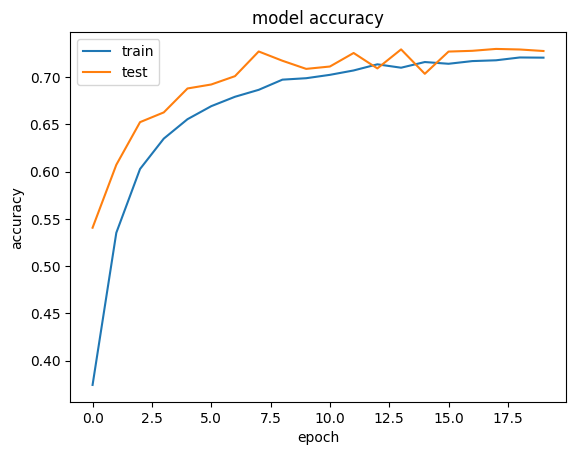

In [209]:
plot_accuracy_evolution(model)

In [ ]:
def plot_loss_evolution(model: keras.Model) -> None:
    _ = plt.plot(model.history.history['loss'])
    _ = plt.plot(model.history.history['val_loss'])
    _ = plt.title('model loss')
    _ = plt.ylabel('loss')
    _ = plt.xlabel('epoch')
    _ = plt.legend(['train', 'test'], loc='upper left')
    
    plt.show()


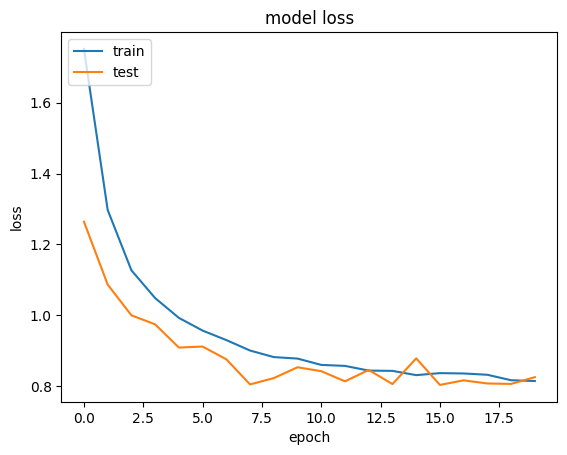

In [210]:
plot_loss_evolution(model)

In [196]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [197]:
y_pred = y_pred.argmax(axis=1)

In [198]:
def plot_confusion_matrix(y_true, y_pred) -> None:
    cm = confusion_matrix(y_true, y_pred) / len(y_true) * 100
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=False, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

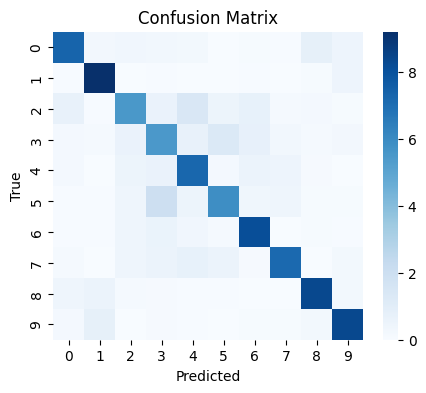

In [211]:
plot_confusion_matrix(y_test.flatten(), y_pred)

## References
